In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (15.0,7.0)

In [51]:
from sklearn.datasets import load_diabetes

In [52]:
diabetes = load_diabetes()

In [53]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
print(diabetes_df.shape)
diabetes_df.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [54]:
diabetes_df['target'] = diabetes.target

In [55]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [56]:
diabetes_df.isnull().sum().sum()

0

In [57]:
X = diabetes_df.drop('target',axis=1).values
y = diabetes_df.target.values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax = MinMaxScaler()

In [61]:
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [78]:
from sklearn.svm import SVC, SVR

In [79]:
svc = SVC()
svr = SVR()

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## for SVC

In [65]:
parameters = parameters = {'C':[.001,.01,.1,1,10,100,1000,10000],
             'kernel':['linear','rbf'],
             'degree':[1,2,3,4],
             'gamma':[.001,.01,.1,1,10,100,1000,10000]}

In [66]:
grid = GridSearchCV(svc,parameters,cv=5,return_train_score=True,refit=True)

In [67]:
grid.fit(X_train_minmax,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [68]:
grid.best_params_

{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

In [69]:
grid.best_score_

0.025889967637540454

In [71]:
y_pred_train = grid.predict(X_train_minmax)

In [72]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train))
print()
print(confusion_matrix(y_train,y_pred_train))
print()
print(classification_report(y_train,y_pred_train))

Accuracy_Score:  0.06472491909385113

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         2
        43.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         3
        49.0       0.00      0.00      0.00         2
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         2
        53.0       0.05      0.25      0.08         4
        55.0       0.00      0.00      0.00         3
        58.0       0.00      0.00      0.00         1
        59.0       0.00      0

In [75]:
y_pred_test = grid.predict(X_test_minmax)

In [76]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test))
print()
print(confusion_matrix(y_test,y_pred_test))
print()
print(classification_report(y_test,y_pred_test))

Accuracy_Score:  0.0

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       1.0
        37.0       0.00      0.00      0.00       1.0
        39.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        44.0       0.00      0.00      0.00       1.0
        45.0       0.00      0.00      0.00       1.0
        47.0       0.00      0.00      0.00       1.0
        49.0       0.00      0.00      0.00       1.0
        51.0       0.00      0.00      0.00       2.0
        52.0       0.00      0.00      0.00       2.0
        53.0       0.00      0.00      0.00       0.0
        54.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       1.0
        57.0       0.00      0.00      0.00       1.0
        59.0       0.00      0.00      0.00   

## for SVR

In [91]:
parameters = parameters = {'C':[.001,.01,.1,1,10,100,1000,10000],
             'kernel':['linear','rbf'],
             'degree':[1,2,3,4],
             'gamma':[.001,.01,.1,1,10,100,1000,10000]}

In [92]:
grid = GridSearchCV(svr,parameters,cv=5,return_train_score=True,refit=True)

In [94]:
grid.fit(X_train_minmax,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [95]:
grid.best_params_

{'C': 1000, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [96]:
grid.best_score_

0.4830982640658916

In [97]:
y_pred_train = grid.predict(X_train_minmax)

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_train,y_pred_train)

0.5605388106002038

In [105]:
y_pred_test = grid.predict(X_test_minmax)

In [106]:
r2_score(y_test,y_pred_test)

0.48137108558759534

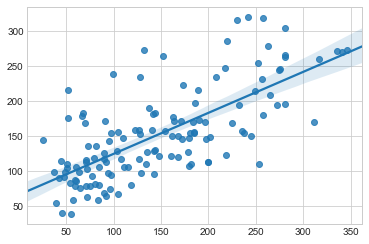

In [107]:
sns.regplot(y_test,y_pred_test)

## Linear Regression Model

In [110]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [111]:
lm.fit(X_train_minmax,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_pred_train_lm = lm.predict(X_train_minmax)

In [115]:
r2_score(y_train,y_pred_train_lm)

0.5341751875813194

In [116]:
y_pred_test_lm = lm.predict(X_test_minmax)

In [117]:
r2_score(y_test,y_pred_test_lm)

0.4576767417719556

## KNN model

In [131]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 7) # n_neighbors = 15

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [133]:
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [134]:
knn.fit(X_train_minmax,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [135]:
y_pred_knn_train = knn.predict(X_train_minmax)

In [136]:
r2_score(y_train,y_pred_knn_train)

0.559567992787456

In [137]:
y_pred_knn_test = knn.predict(X_test_minmax)

In [138]:
r2_score(y_test,y_pred_knn_test)

0.4774485652013668